# MobileNetV1モデル

In [51]:
import cv2
import numpy as np
import tensorflow as tf

In [53]:
# MobileNetV2ロード
mobilenet_v1_model = tf.keras.applications.mobilenet.MobileNet(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3),
)

In [ ]:
# モデル保存
mobilenet_v1_model.save('saved_model', save_format='tf')

In [ ]:
# 保存したモデルのロード
load_model = tf.keras.models.load_model('saved_model')

In [ ]:
# テスト画像ダウンロード
!wget https://user-images.githubusercontent.com/37477845/107120706-12a29d80-68d2-11eb-8f0b-d9b1cf14eb74.jpg  -O pomeranian.jpg

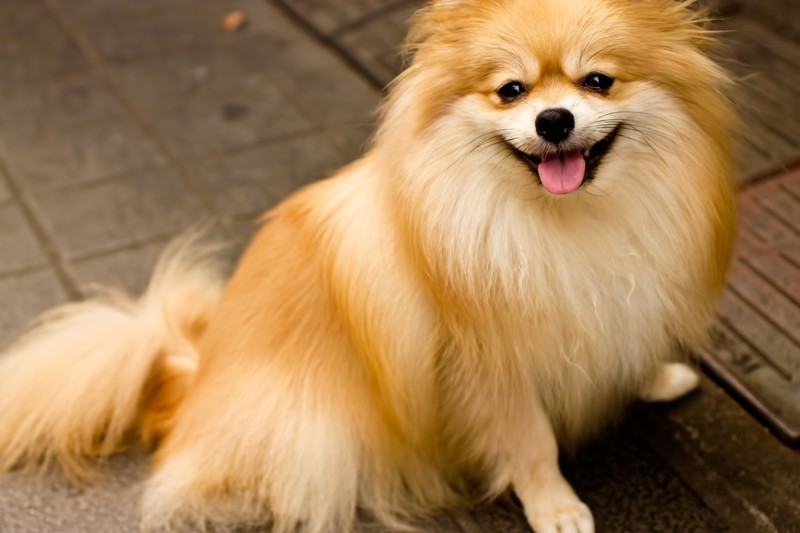

In [57]:
from google.colab.patches import cv2_imshow

#画像のインポート
image = cv2.imread('pomeranian.jpg')
cv2_imshow(image)

In [58]:
# 入力画像成形、および正規化
x = cv2.resize(image, (224, 224))
x = x[:, :, [2, 1, 0]]  # BGR2RGB
x = x.reshape(-1, 224, 224, 3)
x = x.astype('float32')
x /= 255.0

In [59]:
%%time
# 推論実行
classifications = load_model.predict(x)
# 推論結果表示
print(np.argmax(np.squeeze(classifications)))

259
CPU times: user 519 ms, sys: 20.9 ms, total: 540 ms
Wall time: 512 ms


In [60]:
# 推論結果デコード
classifications = tf.keras.applications.mobilenet_v2.decode_predictions(
    classifications,
    top=5,
)
# 推論結果表示
print(np.squeeze(classifications))

[['n02112018' 'Pomeranian' '0.99622667']
 ['n02086079' 'Pekinese' '0.0023389747']
 ['n02086910' 'papillon' '0.0007935127']
 ['n02085620' 'Chihuahua' '0.00035726532']
 ['n02085782' 'Japanese_spaniel' '0.000115625815']]


#  ONNXへ変換

In [ ]:
!pip install onnxruntime
!pip install tf2onnx

In [ ]:
# ONNXモデルへ変換
!python -m tf2onnx.convert --saved-model='saved_model' \
                           --opset=9 \
                           --output='mobilenetv1.onnx'

In [ ]:
# 推論テスト
import onnxruntime
sess_onnxruntime = onnxruntime.InferenceSession('mobilenetv1.onnx')
res = sess_onnxruntime.run(output_names=['Identity:0'], input_feed={'input_1:0':x})
print(np.argmax(res))